# Importing Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
import os
from keras.preprocessing.image import load_img
import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array


# Read Data

In [100]:
ground_truth= pd.read_csv('KCDH_Ground_truth.csv')[:3343]
additional_data= pd.read_csv('KCDH_ADDITIONAL.csv')[:3343]

In [101]:
ground_truth

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3338,ISIC_0027644,0,1,0,0,0,0,0
3339,ISIC_0027645,0,1,0,0,0,0,0
3340,ISIC_0027646,0,1,0,0,0,0,0
3341,ISIC_0027647,0,1,0,0,0,0,0


In [102]:
ground_truth.head()
len(ground_truth)

3343

In [103]:
additional_data.head()

,image,lesion_id,diagnosis_confirm_type
0,ISIC_0024306,HAM_0000550,serial imaging showing no change
1,ISIC_0024307,HAM_0003577,serial imaging showing no change
2,ISIC_0024308,HAM_0001477,serial imaging showing no change
3,ISIC_0024309,HAM_0000484,serial imaging showing no change
4,ISIC_0024310,HAM_0003350,histopathology


In [104]:
training_input= 'KCDH2024_Training_Input'

# Storing all image paths

In [105]:
img_paths_train=[]

for img in os.listdir(training_input):
    path= './'+training_input+'/'+img 
    img_paths_train.append(path)
len(img_paths_train)

3343

In [106]:
num_mel=ground_truth['MEL'].sum()
num_nv=ground_truth['NV'].sum()
num_bcc=ground_truth['BCC'].sum()
num_akiec=ground_truth['AKIEC'].sum()
num_bkl=ground_truth['BKL'].sum()
num_df=ground_truth['DF'].sum()
num_vasc=ground_truth['VASC'].sum()

In [107]:
num_samples= [num_mel, num_nv, num_bcc, num_akiec, num_bkl, num_df, num_vasc]
num_samples

[292, 2294, 169, 127, 372, 41, 48]

In [108]:
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3343 non-null   object
 1   MEL     3343 non-null   int64 
 2   NV      3343 non-null   int64 
 3   BCC     3343 non-null   int64 
 4   AKIEC   3343 non-null   int64 
 5   BKL     3343 non-null   int64 
 6   DF      3343 non-null   int64 
 7   VASC    3343 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 209.1+ KB


In [109]:
weights=[]
for numi in num_samples:
  weights.append(3343/(numi*7))
weights

[1.635518590998043,
 0.20818283721509528,
 2.8258664412510566,
 3.760404949381327,
 1.283794162826421,
 11.64808362369338,
 9.949404761904763]

In [110]:
df_MEL= ground_truth[ground_truth['MEL']==1]
df_NV= ground_truth[ground_truth['NV']==1]
df_BCC= ground_truth[ground_truth['BCC']==1]
df_AKIEC= ground_truth[ground_truth['AKIEC']==1]
df_BKL= ground_truth[ground_truth['BKL']==1]
df_DF= ground_truth[ground_truth['DF']==1]
df_VASC= ground_truth[ground_truth['VASC']==1]
len(df_MEL)
df_BCC

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
25,ISIC_0024331,0,0,1,0,0,0,0
26,ISIC_0024332,0,0,1,0,0,0,0
39,ISIC_0024345,0,0,1,0,0,0,0
54,ISIC_0024360,0,0,1,0,0,0,0
97,ISIC_0024403,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
3289,ISIC_0027595,0,0,1,0,0,0,0
3295,ISIC_0027601,0,0,1,0,0,0,0
3303,ISIC_0027609,0,0,1,0,0,0,0
3323,ISIC_0027629,0,0,1,0,0,0,0


In [111]:
indices= df_MEL.index
indices[3]

17

# Visualising Images for all 7 classes using Matplotlib

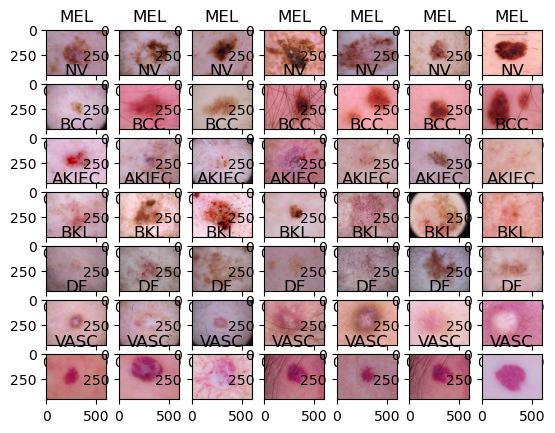

In [112]:
plt1, axs= plt.subplots(7,7)
c=0
for col in ground_truth.columns:
    if col!= 'image':
        
        indices= ground_truth[ground_truth[col]==1].index
    
      
        for i in range(7):
            index= indices[random.randint(0, len(indices))]
            path= img_paths_train[index]
            load= load_img(path)
            load= np.array(load)
            axs[c,i].imshow(load)
            axs[c,i].set_title(col)
            
            
        c+=1    
plt.show() 

In [113]:
for i in img_paths_train:
    if '.jpg' not in i:
        print(i)
      

# Test Data

In [114]:
test_input= 'KCDH2024_Test_Input'
img_paths_test=[]

for img in os.listdir(test_input):
    path= './'+test_input+'/'+img 
    img_paths_test.append(path)
len(img_paths_test)
img_paths_test= img_paths_test[:1000]
len(img_paths_test)

ground_truth_test= pd.read_csv('KCDH_test_labels.csv')[:1000]

In [115]:
num_mel_test=ground_truth_test['MEL'].sum()
num_nv_test=ground_truth_test['NV'].sum()
num_bcc_test=ground_truth_test['BCC'].sum()
num_akiec_test=ground_truth_test['AKIEC'].sum()
num_bkl_test=ground_truth_test['BKL'].sum()
num_df_test=ground_truth_test['DF'].sum()
num_vasc_test=ground_truth_test['VASC'].sum()
num_samples_test= [num_mel_test, num_nv_test, num_bcc_test, num_akiec_test, num_bkl_test, num_df_test, num_vasc_test]
num_samples_test

[92, 645, 55, 32, 135, 20, 21]

In [116]:
df_MEL_test= ground_truth_test[ground_truth_test['MEL']==1]
df_NV_test= ground_truth_test[ground_truth_test['NV']==1]
df_BCC_test= ground_truth_test[ground_truth_test['BCC']==1]
df_AKIEC_test= ground_truth_test[ground_truth_test['AKIEC']==1]
df_BKL_test= ground_truth_test[ground_truth_test['BKL']==1]
df_DF_test= ground_truth_test[ground_truth_test['DF']==1]
df_VASC_test= ground_truth_test[ground_truth_test['VASC']==1]
len(df_MEL_test)
df_BCC

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
25,ISIC_0024331,0,0,1,0,0,0,0
26,ISIC_0024332,0,0,1,0,0,0,0
39,ISIC_0024345,0,0,1,0,0,0,0
54,ISIC_0024360,0,0,1,0,0,0,0
97,ISIC_0024403,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
3289,ISIC_0027595,0,0,1,0,0,0,0
3295,ISIC_0027601,0,0,1,0,0,0,0
3303,ISIC_0027609,0,0,1,0,0,0,0
3323,ISIC_0027629,0,0,1,0,0,0,0


## Split-  75:25

In [117]:
def train_test_split1(img_paths_train, img_paths_test, ground_truth, ground_truth_test, category):
    train= pd.DataFrame()
    train['images']= img_paths_train
    train['labels']= ground_truth[category]

    test= pd.DataFrame()
    test['images']= img_paths_test
    test['labels']= ground_truth_test[category]


    train_generator= ImageDataGenerator(
        rescale=1./255,
        rotation_range= 40,
        shear_range= 0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_iterator= train_generator.flow_from_dataframe(train, x_col='images', 
                                                        y_col='labels',
                                                        target_size=(128,128), 
                                                        batch_size=32, 
                                                        class_mode='raw' )
    val_generator= ImageDataGenerator(rescale=1./255)
    val_iterator= val_generator.flow_from_dataframe(test, x_col='images', 
                                                        y_col='labels',
                                                        target_size=(128,128), 
                                                        batch_size=32, 
                                                        class_mode='raw' )

    return train_iterator, val_iterator

In [118]:
a,b=train_test_split1(img_paths_train, img_paths_test, ground_truth, ground_truth_test, 'BKL')

Found 3343 validated image filenames.
Found 1000 validated image filenames.


In [119]:
b[1][0][2].shape

(128, 128, 3)

## Build Model

In [120]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size= (3,3,), padding= 'valid', activation= 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size= (3,3,), padding= 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size= (3,3,), padding= 'valid', activation= 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\shau\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
#hist= model.fit(a, epochs=10, validation_data=b)

In [122]:
#Data Augmentation by keras

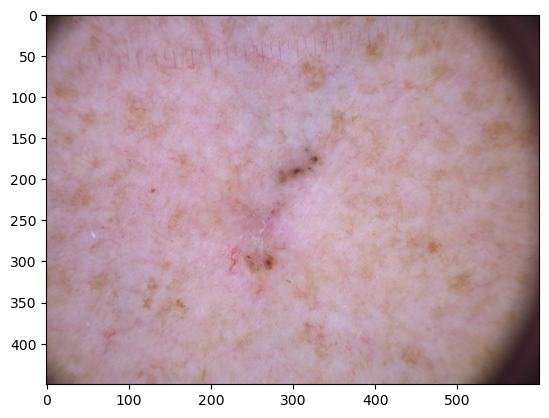

In [123]:
img_paths_train[54]
load= load_img(img_paths_train[54])
load= np.array(load)
plt.imshow(load)

# Augmenting Data using Keras Preprocessing Techniques

In [124]:
img = load_img(img_paths_train[6])  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape) 

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

num_augmented_images = 5



indices= df_MEL.index

for j in range(len(df_MEL)):
    i = 0
    img= load_img(img_paths_train[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="MEL_AUG", save_prefix= 'MEL', save_format= 'jpg'):
        print('yes ', j)
        i += 1
        if i == num_augmented_images:
            break
            
indices= df_MEL_test.index

for j in range(len(df_MEL_test)):
    i = 0
    img= load_img(img_paths_test[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="MEL_AUG_TEST", save_prefix= 'MEL', save_format= 'jpg'):
        print('yes TEST ', j)
        i += 1
        if i == num_augmented_images:
            break            


yes  0
yes  0
yes  0
yes  0
yes  0
yes  1
yes  1
yes  1
yes  1
yes  1
yes  2
yes  2
yes  2
yes  2
yes  2
yes  3
yes  3
yes  3
yes  3
yes  3
yes  4
yes  4
yes  4
yes  4
yes  4
yes  5
yes  5
yes  5
yes  5
yes  5
yes  6
yes  6
yes  6
yes  6
yes  6
yes  7
yes  7
yes  7
yes  7
yes  7
yes  8
yes  8
yes  8
yes  8
yes  8
yes  9
yes  9
yes  9
yes  9
yes  9
yes  10
yes  10
yes  10
yes  10
yes  10
yes  11
yes  11
yes  11
yes  11
yes  11
yes  12
yes  12
yes  12
yes  12
yes  12
yes  13
yes  13
yes  13
yes  13
yes  13
yes  14
yes  14
yes  14
yes  14
yes  14
yes  15
yes  15
yes  15
yes  15
yes  15
yes  16
yes  16
yes  16
yes  16
yes  16
yes  17
yes  17
yes  17
yes  17
yes  17
yes  18
yes  18
yes  18
yes  18
yes  18
yes  19
yes  19
yes  19
yes  19
yes  19
yes  20
yes  20
yes  20
yes  20
yes  20
yes  21
yes  21
yes  21
yes  21
yes  21
yes  22
yes  22
yes  22
yes  22
yes  22
yes  23
yes  23
yes  23
yes  23
yes  23
yes  24
yes  24
yes  24
yes  24
yes  24
yes  25
yes  25
yes  25
yes  25
yes  25
yes  26
ye

In [125]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.6,
    horizontal_flip=True,
    fill_mode='nearest')

num_augmented_images = 10



indices= df_BCC.index

for j in range(len(df_BCC)):
    i = 0
    img= load_img(img_paths_train[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="BCC_AUG", save_prefix= 'BCC', save_format= 'jpg'):
        print('yes ', j)
        i += 1
        if i == num_augmented_images:
            break
            
indices= df_BCC_test.index

for j in range(len(df_BCC_test)):
    i = 0
    img= load_img(img_paths_test[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="BCC_AUG_TEST", save_prefix= 'BCC', save_format= 'jpg'):
        print('yes TEST', j)
        i += 1
        if i == num_augmented_images:
            break            

yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes 

In [126]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

num_augmented_images = 10



indices= df_AKIEC.index

for j in range(len(df_AKIEC)):
    i = 0
    img= load_img(img_paths_train[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="AKIEC_AUG", save_prefix= 'AKIEC', save_format= 'jpg'):
        print('yes ', j)
        i += 1
        if i == num_augmented_images:
            break
            
indices= df_AKIEC_test.index

for j in range(len(df_AKIEC_test)):
    i = 0
    img= load_img(img_paths_test[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="AKIEC_AUG_TEST", save_prefix= 'AKIEC', save_format= 'jpg'):
        print('yes TEST', j)
        i += 1
        if i == num_augmented_images:
            break             

yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes 

In [127]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest')

num_augmented_images = 4



indices= df_BKL.index

for j in range(len(df_BKL)):
    i = 0
    img= load_img(img_paths_train[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="BKL_AUG", save_prefix= 'BKL', save_format= 'jpg'):
        print('yes ', j)
        i += 1
        if i == num_augmented_images:
            break
            
            
indices= df_BKL_test.index

for j in range(len(df_BKL_test)):
    i = 0
    img= load_img(img_paths_test[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="BKL_AUG_TEST", save_prefix= 'BKL', save_format= 'jpg'):
        print('yes TEST', j)
        i += 1
        if i == num_augmented_images:
            break            

yes  0
yes  0
yes  0
yes  0
yes  1
yes  1
yes  1
yes  1
yes  2
yes  2
yes  2
yes  2
yes  3
yes  3
yes  3
yes  3
yes  4
yes  4
yes  4
yes  4
yes  5
yes  5
yes  5
yes  5
yes  6
yes  6
yes  6
yes  6
yes  7
yes  7
yes  7
yes  7
yes  8
yes  8
yes  8
yes  8
yes  9
yes  9
yes  9
yes  9
yes  10
yes  10
yes  10
yes  10
yes  11
yes  11
yes  11
yes  11
yes  12
yes  12
yes  12
yes  12
yes  13
yes  13
yes  13
yes  13
yes  14
yes  14
yes  14
yes  14
yes  15
yes  15
yes  15
yes  15
yes  16
yes  16
yes  16
yes  16
yes  17
yes  17
yes  17
yes  17
yes  18
yes  18
yes  18
yes  18
yes  19
yes  19
yes  19
yes  19
yes  20
yes  20
yes  20
yes  20
yes  21
yes  21
yes  21
yes  21
yes  22
yes  22
yes  22
yes  22
yes  23
yes  23
yes  23
yes  23
yes  24
yes  24
yes  24
yes  24
yes  25
yes  25
yes  25
yes  25
yes  26
yes  26
yes  26
yes  26
yes  27
yes  27
yes  27
yes  27
yes  28
yes  28
yes  28
yes  28
yes  29
yes  29
yes  29
yes  29
yes  30
yes  30
yes  30
yes  30
yes  31
yes  31
yes  31
yes  31
yes  32
yes  32


In [128]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

num_augmented_images = 10



indices= df_DF.index

for j in range(len(df_DF)):
    i = 0
    img= load_img(img_paths_train[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="DF_AUG", save_prefix= 'DF', save_format= 'jpg'):
        print('yes ', j)
        i += 1
        if i == num_augmented_images:
            break
            
            
indices= df_DF_test.index

for j in range(len(df_DF_test)):
    i = 0
    img= load_img(img_paths_test[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="DF_AUG_TEST", save_prefix= 'DF', save_format= 'jpg'):
        print('yes TEST', j)
        i += 1
        if i == num_augmented_images:
            break            

yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes 

In [129]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

num_augmented_images = 10



indices= df_VASC.index

for j in range(len(df_VASC)):
    i = 0
    img= load_img(img_paths_train[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="VASC_AUG", save_prefix= 'VASC', save_format= 'jpg'):
        print('yes ', j)
        i += 1
        if i == num_augmented_images:
            break

indices= df_VASC_test.index

for j in range(len(df_VASC_test)):
    i = 0
    img= load_img(img_paths_test[indices[j]])
    x= img_to_array(img)
    x= x.reshape((1,)+ x.shape)
    for batch in datagen.flow(x, batch_size=1, save_to_dir="VASC_AUG_TEST", save_prefix= 'VASC', save_format= 'jpg'):
        print('yes TEST', j)
        i += 1
        if i == num_augmented_images:
            break            

yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  0
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  1
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  2
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  3
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  4
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  5
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  6
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  7
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  8
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  9
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  10
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  11
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  12
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes  13
yes 

## Concatenate Previous and Augmented Data

In [140]:
train_input_AKIEC= 'AKIEC_AUG'
img_paths_train_aug_AKIEC=[]

for img in os.listdir(train_input_AKIEC):
    path= './'+train_input_AKIEC+'/'+img 
    img_paths_train_aug_AKIEC.append(path)
    
test_input_AKIEC= 'AKIEC_AUG_TEST'
img_paths_test_aug_AKIEC=[]

for img in os.listdir(test_input_AKIEC):
    path= './'+test_input_AKIEC+'/'+img 
    img_paths_test_aug_AKIEC.append(path)  
    
len(img_paths_train_aug_AKIEC), len(img_paths_test_aug_AKIEC)    

(1199, 314)

In [156]:
type(ground_truth['AKIEC'])

pandas.core.series.Series

In [180]:
aug_labels_train_AKIEC= np.ones(1199)
aug_labels_test_AKIEC= np.ones(314)

ground_truth_aug_AKIEC= pd.DataFrame()
ground_truth_aug_AKIEC['image']= img_paths_train_aug_AKIEC
ground_truth_aug_AKIEC['MEL']= np.zeros(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC['NV']= np.zeros(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC['BCC']= np.zeros(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC['AKIEC']= np.ones(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC['BKL']= np.zeros(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC['DF']= np.zeros(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC['VASC']= np.zeros(len(img_paths_train_aug_AKIEC))
ground_truth_aug_AKIEC.reset_index(drop= True)
ground_truth_copy= ground_truth.copy()
img_paths_train_AKIEC= img_paths_train+ img_paths_train_aug_AKIEC
ground_truth_AKIEC= pd.concat([ground_truth_copy, ground_truth_aug_AKIEC])


ground_truth_test_aug_AKIEC= pd.DataFrame()
ground_truth_test_aug_AKIEC['image']= img_paths_test_aug_AKIEC
ground_truth_test_aug_AKIEC['MEL']= np.zeros(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC['NV']= np.zeros(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC['BCC']= np.zeros(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC['AKIEC']= np.ones(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC['BKL']= np.zeros(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC['DF']= np.zeros(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC['VASC']= np.zeros(len(img_paths_test_aug_AKIEC))
ground_truth_test_aug_AKIEC.reset_index(drop= True)
ground_truth_test_copy= ground_truth_test.copy()
img_paths_test_AKIEC= img_paths_test+ img_paths_test_aug_AKIEC
ground_truth_test_AKIEC= pd.concat([ground_truth_test_copy, ground_truth_test_aug_AKIEC])

ground_truth_AKIEC.reset_index(drop= True, inplace= True)
ground_truth_test_AKIEC.reset_index(drop= True, inplace= True)



len(img_paths_train_AKIEC), len(ground_truth_AKIEC)
ground_truth_AKIEC, ground_truth_test_AKIEC

(                             image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0                     ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 1                     ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 2                     ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 3                     ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 4                     ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 ...                            ...  ...  ...  ...    ...  ...  ...   ...
 4537  ./AKIEC_AUG/AKIEC_0_9927.jpg  0.0  0.0  0.0    1.0  0.0  0.0   0.0
 4538  ./AKIEC_AUG/AKIEC_0_9990.jpg  0.0  0.0  0.0    1.0  0.0  0.0   0.0
 4539  ./AKIEC_AUG/AKIEC_0_9994.jpg  0.0  0.0  0.0    1.0  0.0  0.0   0.0
 4540  ./AKIEC_AUG/AKIEC_0_9996.jpg  0.0  0.0  0.0    1.0  0.0  0.0   0.0
 4541  ./AKIEC_AUG/AKIEC_0_9997.jpg  0.0  0.0  0.0    1.0  0.0  0.0   0.0
 
 [4542 rows x 8 columns],
                                   image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0   

In [183]:
train_input_DF= 'DF_AUG'
img_paths_train_aug_DF=[]

for img in os.listdir(train_input_DF):
    path= './'+train_input_DF+'/'+img 
    img_paths_train_aug_DF.append(path)
    
test_input_DF= 'DF_AUG_TEST'
img_paths_test_aug_DF=[]

for img in os.listdir(test_input_DF):
    path= './'+test_input_DF+'/'+img 
    img_paths_test_aug_DF.append(path)  
    
aug_labels_train_DF= np.ones(1199)
aug_labels_test_DF= np.ones(314)

ground_truth_aug_DF= pd.DataFrame()
ground_truth_aug_DF['image']= img_paths_train_aug_DF
ground_truth_aug_DF['MEL']= np.zeros(len(img_paths_train_aug_DF))
ground_truth_aug_DF['NV']= np.zeros(len(img_paths_train_aug_DF))
ground_truth_aug_DF['BCC']= np.zeros(len(img_paths_train_aug_DF))
ground_truth_aug_DF['AKIEC']= np.zeros(len(img_paths_train_aug_DF))
ground_truth_aug_DF['BKL']= np.zeros(len(img_paths_train_aug_DF))
ground_truth_aug_DF['DF']= np.ones(len(img_paths_train_aug_DF))
ground_truth_aug_DF['VASC']= np.zeros(len(img_paths_train_aug_DF))
ground_truth_aug_DF.reset_index(drop= True)
ground_truth_copy= ground_truth.copy()
img_paths_train_DF= img_paths_train+ img_paths_train_aug_DF
ground_truth_DF= pd.concat([ground_truth_copy, ground_truth_aug_DF])


ground_truth_test_aug_DF= pd.DataFrame()
ground_truth_test_aug_DF['image']= img_paths_test_aug_DF
ground_truth_test_aug_DF['MEL']= np.zeros(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF['NV']= np.zeros(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF['BCC']= np.zeros(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF['AKIEC']= np.zeros(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF['BKL']= np.zeros(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF['DF']= np.ones(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF['VASC']= np.zeros(len(img_paths_test_aug_DF))
ground_truth_test_aug_DF.reset_index(drop= True)
ground_truth_test_copy= ground_truth_test.copy()
img_paths_test_DF= img_paths_test+ img_paths_test_aug_DF
ground_truth_test_DF= pd.concat([ground_truth_test_copy, ground_truth_test_aug_DF])

ground_truth_DF.reset_index(drop= True, inplace= True)
ground_truth_test_DF.reset_index(drop= True, inplace= True)



len(img_paths_train_DF), len(ground_truth_DF)
ground_truth_DF, ground_truth_test_DF   

(                       image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0               ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 1               ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 2               ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 3               ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 4               ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 ...                      ...  ...  ...  ...    ...  ...  ...   ...
 3743  ./DF_AUG/DF_0_9858.jpg  0.0  0.0  0.0    0.0  0.0  1.0   0.0
 3744  ./DF_AUG/DF_0_9868.jpg  0.0  0.0  0.0    0.0  0.0  1.0   0.0
 3745  ./DF_AUG/DF_0_9879.jpg  0.0  0.0  0.0    0.0  0.0  1.0   0.0
 3746  ./DF_AUG/DF_0_9908.jpg  0.0  0.0  0.0    0.0  0.0  1.0   0.0
 3747   ./DF_AUG/DF_0_997.jpg  0.0  0.0  0.0    0.0  0.0  1.0   0.0
 
 [3748 rows x 8 columns],
                             image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0                    ISIC_0034524  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 1        

In [184]:
train_input_VASC= 'VASC_AUG'
img_paths_train_aug_VASC=[]

for img in os.listdir(train_input_VASC):
    path= './'+train_input_VASC+'/'+img 
    img_paths_train_aug_VASC.append(path)
    
test_input_VASC= 'VASC_AUG_TEST'
img_paths_test_aug_VASC=[]

for img in os.listdir(test_input_VASC):
    path= './'+test_input_VASC+'/'+img 
    img_paths_test_aug_VASC.append(path)  
    
aug_labels_train_VASC= np.ones(1199)
aug_labels_test_VASC= np.ones(314)

ground_truth_aug_VASC= pd.DataFrame()
ground_truth_aug_VASC['image']= img_paths_train_aug_VASC
ground_truth_aug_VASC['MEL']= np.zeros(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC['NV']= np.zeros(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC['BCC']= np.zeros(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC['AKIEC']= np.zeros(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC['BKL']= np.zeros(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC['DF']= np.zeros(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC['VASC']= np.ones(len(img_paths_train_aug_VASC))
ground_truth_aug_VASC.reset_index(drop= True)
ground_truth_copy= ground_truth.copy()
img_paths_train_VASC= img_paths_train+ img_paths_train_aug_VASC
ground_truth_VASC= pd.concat([ground_truth_copy, ground_truth_aug_VASC])


ground_truth_test_aug_VASC= pd.DataFrame()
ground_truth_test_aug_VASC['image']= img_paths_test_aug_VASC
ground_truth_test_aug_VASC['MEL']= np.zeros(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC['NV']= np.zeros(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC['BCC']= np.zeros(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC['AKIEC']= np.zeros(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC['BKL']= np.zeros(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC['DF']= np.zeros(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC['VASC']= np.ones(len(img_paths_test_aug_VASC))
ground_truth_test_aug_VASC.reset_index(drop= True)
ground_truth_test_copy= ground_truth_test.copy()
img_paths_test_VASC= img_paths_test+ img_paths_test_aug_VASC
ground_truth_test_VASC= pd.concat([ground_truth_test_copy, ground_truth_test_aug_VASC])

ground_truth_VASC.reset_index(drop= True, inplace= True)
ground_truth_test_VASC.reset_index(drop= True, inplace= True)



len(img_paths_train_VASC), len(ground_truth_VASC)
ground_truth_VASC, ground_truth_test_VASC 

(                           image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0                   ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 1                   ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 2                   ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 3                   ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 4                   ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 ...                          ...  ...  ...  ...    ...  ...  ...   ...
 3807  ./VASC_AUG/VASC_0_9881.jpg  0.0  0.0  0.0    0.0  0.0  0.0   1.0
 3808  ./VASC_AUG/VASC_0_9915.jpg  0.0  0.0  0.0    0.0  0.0  0.0   1.0
 3809  ./VASC_AUG/VASC_0_9929.jpg  0.0  0.0  0.0    0.0  0.0  0.0   1.0
 3810  ./VASC_AUG/VASC_0_9940.jpg  0.0  0.0  0.0    0.0  0.0  0.0   1.0
 3811  ./VASC_AUG/VASC_0_9990.jpg  0.0  0.0  0.0    0.0  0.0  0.0   1.0
 
 [3812 rows x 8 columns],
                                 image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0                        ISIC_

## Create Iterators for MEL, DF and VASC 

In [190]:
train_iter_DF, val_iter_DF= train_test_split1(img_paths_train_DF, img_paths_test_DF, ground_truth_DF, ground_truth_test_DF, 'DF')

Found 3748 validated image filenames.
Found 1200 validated image filenames.


In [191]:
train_iter_VASC, val_iter_VASC= train_test_split1(img_paths_train_VASC, img_paths_test_VASC, ground_truth_VASC, ground_truth_test_VASC, 'VASC')

Found 3812 validated image filenames.
Found 1209 validated image filenames.


# Training at 50 epochs

In [193]:
hist_df= model.fit(train_iter_DF, epochs=50, validation_data= val_iter_DF)

Epoch 1/50


C:\Users\shau\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8799 - loss: 0.4014 - val_accuracy: 0.8167 - val_loss: 0.4787
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 98s 798ms/step - accuracy: 0.8859 - loss: 0.3491 - val_accuracy: 0.8283 - val_loss: 0.4351
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 98s 801ms/step - accuracy: 0.8838 - loss: 0.2828 - val_accuracy: 0.8167 - val_loss: 0.4107
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 100s 821ms/step - accuracy: 0.8729 - loss: 0.2968 - val_accuracy: 0.8192 - val_loss: 0.4010
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 115s 939ms/step - accuracy: 0.8799 - loss: 0.2796 - val_accuracy: 0.8167 - val_loss: 0.4251
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 99s 804ms/step - accuracy: 0.8786 - loss: 0.2762 - val_accuracy: 0.8442 - val_loss: 0.4035
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 97s 795ms/step - accuracy: 0.8924 - loss: 0.2525 - val_accuracy: 0.8250 - val_loss: 0.4351
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 73s 585ms/step - accuracy: 0.8858 - loss: 0.2755 - val

In [ ]:
hist_df= model.fit(train_iter_DF, epochs=50, validation_data= val_iter_DF)

In [194]:
y= model.predict(val_iter_DF)

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step


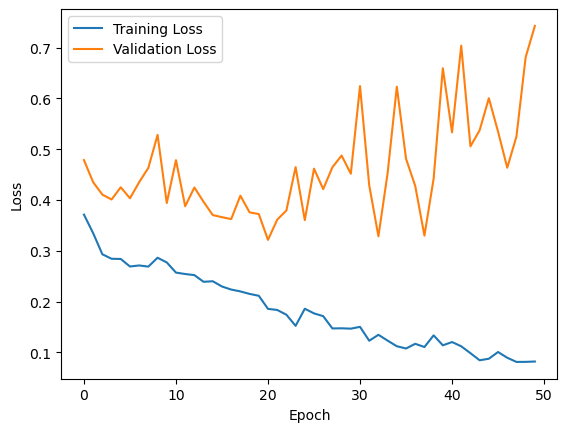

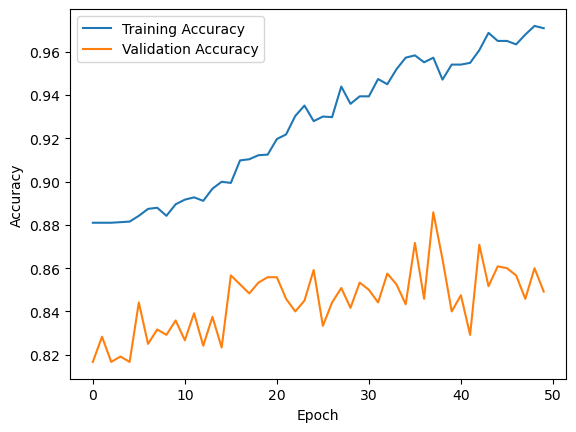

In [195]:
plt.plot(hist_df.history['loss'], label='Training Loss')
plt.plot(hist_df.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(hist_df.history['accuracy'], label='Training Accuracy')
plt.plot(hist_df.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [197]:
hist_vasc= model.fit(train_iter_VASC, epochs=50, validation_data= val_iter_VASC)

Epoch 1/50


C:\Users\shau\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 85s 682ms/step - accuracy: 0.9296 - loss: 0.2421 - val_accuracy: 0.9347 - val_loss: 0.2847
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 71s 573ms/step - accuracy: 0.9844 - loss: 0.0468 - val_accuracy: 0.9529 - val_loss: 0.1287
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 585ms/step - accuracy: 0.9825 - loss: 0.0435 - val_accuracy: 0.9322 - val_loss: 0.2343
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 70s 565ms/step - accuracy: 0.9813 - loss: 0.0538 - val_accuracy: 0.9479 - val_loss: 0.1484
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 612ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9545 - val_loss: 0.1763
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 593ms/step - accuracy: 0.9898 - loss: 0.0332 - val_accuracy: 0.9479 - val_loss: 0.2122
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 75s 610ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9545 - val_loss: 0.2096
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 589ms/step - accuracy: 0.9902 - loss: 0.0303 - val

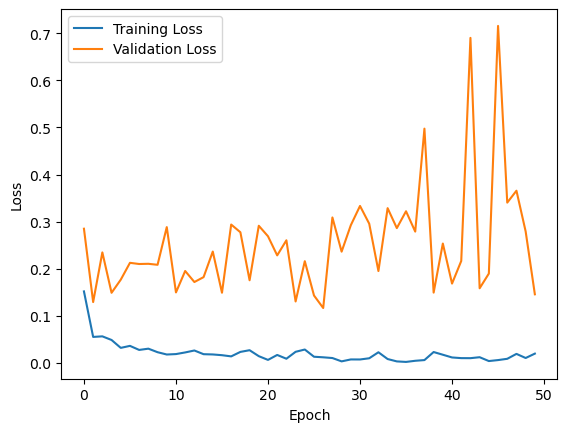

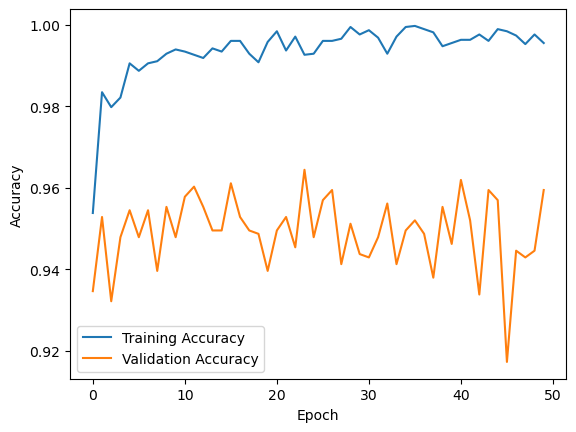

In [198]:
plt.plot(hist_vasc.history['loss'], label='Training Loss')
plt.plot(hist_vasc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(hist_vasc.history['accuracy'], label='Training Accuracy')
plt.plot(hist_vasc.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [200]:
train_input_MEL= 'MEL_AUG'
img_paths_train_aug_MEL=[]

for img in os.listdir(train_input_MEL):
    path= './'+train_input_MEL+'/'+img 
    img_paths_train_aug_MEL.append(path)
    
test_input_MEL= 'MEL_AUG_TEST'
img_paths_test_aug_MEL=[]

for img in os.listdir(test_input_MEL):
    path= './'+test_input_MEL+'/'+img 
    img_paths_test_aug_MEL.append(path)  
    
aug_labels_train_MEL= np.ones(1199)
aug_labels_test_MEL= np.ones(314)

ground_truth_aug_MEL= pd.DataFrame()
ground_truth_aug_MEL['image']= img_paths_train_aug_MEL
ground_truth_aug_MEL['MEL']= np.ones(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL['NV']= np.zeros(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL['BCC']= np.zeros(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL['AKIEC']= np.zeros(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL['BKL']= np.zeros(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL['DF']= np.zeros(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL['VASC']= np.zeros(len(img_paths_train_aug_MEL))
ground_truth_aug_MEL.reset_index(drop= True)
ground_truth_copy= ground_truth.copy()
img_paths_train_MEL= img_paths_train+ img_paths_train_aug_MEL
ground_truth_MEL= pd.concat([ground_truth_copy, ground_truth_aug_MEL])


ground_truth_test_aug_MEL= pd.DataFrame()
ground_truth_test_aug_MEL['image']= img_paths_test_aug_MEL
ground_truth_test_aug_MEL['MEL']= np.ones(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL['NV']= np.zeros(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL['BCC']= np.zeros(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL['AKIEC']= np.zeros(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL['BKL']= np.zeros(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL['DF']= np.zeros(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL['VASC']= np.zeros(len(img_paths_test_aug_MEL))
ground_truth_test_aug_MEL.reset_index(drop= True)
ground_truth_test_copy= ground_truth_test.copy()
img_paths_test_MEL= img_paths_test+ img_paths_test_aug_MEL
ground_truth_test_MEL= pd.concat([ground_truth_test_copy, ground_truth_test_aug_MEL])

ground_truth_MEL.reset_index(drop= True, inplace= True)
ground_truth_test_MEL.reset_index(drop= True, inplace= True)



len(img_paths_train_MEL), len(ground_truth_MEL)
ground_truth_MEL, ground_truth_test_MEL

(                         image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0                 ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 1                 ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 2                 ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 3                 ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
 4                 ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 ...                        ...  ...  ...  ...    ...  ...  ...   ...
 4706  ./MEL_AUG/MEL_0_9952.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 4707  ./MEL_AUG/MEL_0_9954.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 4708  ./MEL_AUG/MEL_0_9967.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 4709  ./MEL_AUG/MEL_0_9968.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 4710  ./MEL_AUG/MEL_0_9983.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0
 
 [4711 rows x 8 columns],
                               image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
 0                      ISIC_0034524  0.0  1.0  0.0    0.

In [201]:
train_iter_MEL, val_iter_MEL= train_test_split1(img_paths_train_MEL, img_paths_test_MEL, ground_truth_MEL, ground_truth_test_MEL, 'MEL')
hist_MEL= model.fit(train_iter_MEL, epochs=50, validation_data= val_iter_MEL)

Found 4711 validated image filenames.
Found 1444 validated image filenames.
Epoch 1/50


C:\Users\shau\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 96s 628ms/step - accuracy: 0.6984 - loss: 0.7591 - val_accuracy: 0.5990 - val_loss: 0.7274
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 88s 579ms/step - accuracy: 0.7929 - loss: 0.4360 - val_accuracy: 0.8490 - val_loss: 0.3467
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 85s 558ms/step - accuracy: 0.8459 - loss: 0.3394 - val_accuracy: 0.8684 - val_loss: 0.3200
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 82s 537ms/step - accuracy: 0.8509 - loss: 0.3308 - val_accuracy: 0.8566 - val_loss: 0.3289
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 90s 592ms/step - accuracy: 0.8669 - loss: 0.3049 - val_accuracy: 0.8698 - val_loss: 0.3043
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 84s 548ms/step - accuracy: 0.8745 - loss: 0.2884 - val_accuracy: 0.8712 - val_loss: 0.3113
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 91s 597ms/step - accuracy: 0.8751 - loss: 0.2823 - val_accuracy: 0.8913 - val_loss: 0.2883
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 91s 601ms/step - accuracy: 0.8834 - loss: 0.2669 - val

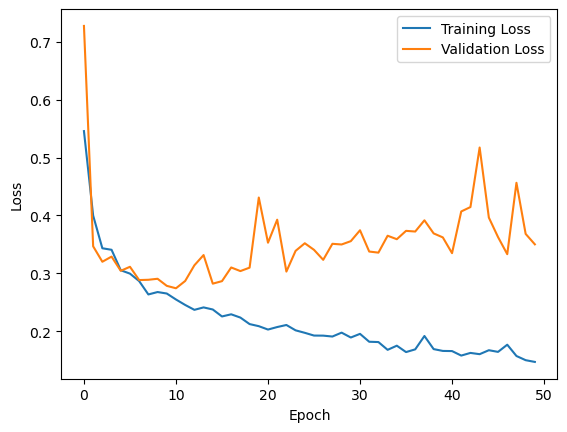

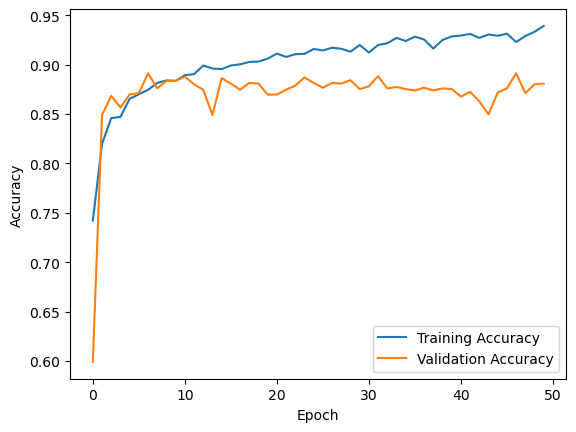

In [202]:
plt.plot(hist_MEL.history['loss'], label='Training Loss')
plt.plot(hist_MEL.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(hist_MEL.history['accuracy'], label='Training Accuracy')
plt.plot(hist_MEL.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [213]:
model.save('./model.keras')